In [80]:
# Libraries 
import time
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ranksums
from BayesNet import BayesNet
from BNReasoner import BNReasoner
from matplotlib import pyplot as plt

# Set the path to the BIFXML file
path = 'testing/lecture_example.BIFXML'
# path = 'testing/dog_problem.BIFXML'

# Load the network
net = BayesNet()
bn = BNReasoner(net)
net.load_from_bifxml(path)

['Winter?', 'Sprinkler?', 'Rain?', 'Wet Grass?', 'Slippery Road?']


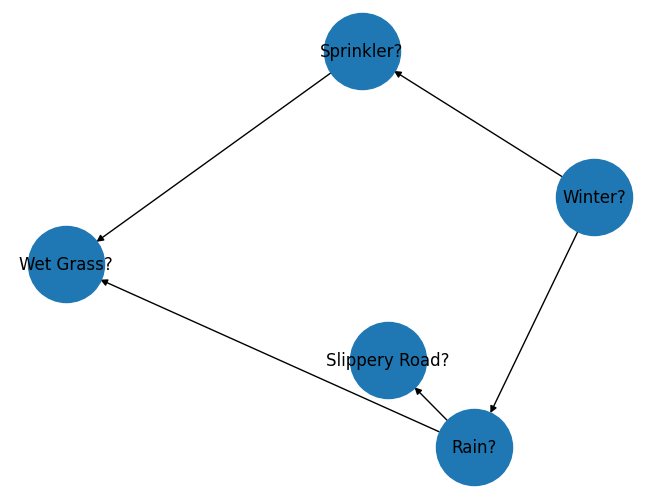

In [81]:
# Get the nodes in the network
print(net.get_all_variables())

# Draw the network
net.draw_structure()

## d-Separation & Independence

---
Since we assume that the graphs are _faithful_ this means that the opposite way also holds; so IF independent THEN d-separated. So let's check this with two examples: 
1. __IF__ d-separated, __THEN__ independent, which should give the same result as
2. __IF__ independent, __THEN__ d-seperated

__Important note:__ If X is NOT d-seperated of Y given Z, it is not guaranteed that X and Y are independent of each other given Z.

---

In [82]:
# ['Winter?', 'Sprinkler?', 'Rain?', 'Wet Grass?', 'Slippery Road?']
d_seperation = bn.d_separation(['Wet Grass?'], ['Rain?'], ['Slippery Road?'])
if d_seperation:
    print("No path is found between X and Y given Z, so X is d-seperated of Y given Z, meaning that X and Y are independent of each other given Z")
else:
    print("A path is found between X and Y given Z, so X is NOT d-seperated of Y given Z, meaning that it is not guaranteed that X and Y are independent of each other given Z")

No path is found between X and Y given Z, so X is d-seperated of Y given Z, meaning that X and Y are independent of each other given Z


In [83]:
inependence = bn.independence(['Wet Grass?'], ['Rain?'], ['Slippery Road?'])
if inependence:
    print("X and Y are independent of each other given Z, so therefore X is d-seperated of Y given Z")
else:
    print("It is not guaranteed that X and Y are independent of each other given Z, so to check for d-seperation the specific function d_seperation() should be used")

X and Y are independent of each other given Z, so therefore X is d-seperated of Y given Z


## Network-Pruning

---

- Edge-pruning: Delete all outgoing edges that are in the Evidence 
- Node-Pruning: Delete all leaf nodes that are NOT in the Query or in the Evidence & repeat as often as possible

['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']


---

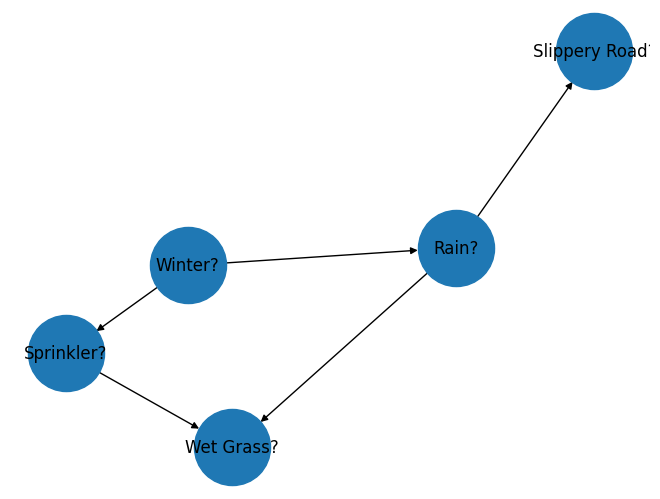

In [84]:
# Original Network
net.draw_structure()

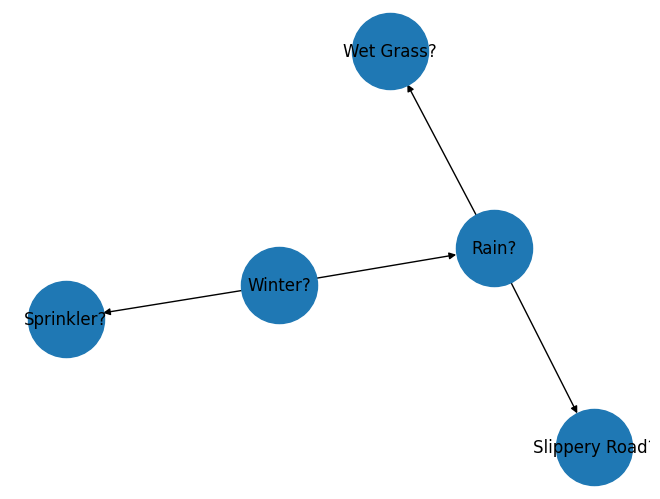

In [90]:
# Network after pruning
bn.network_pruning(Query = ['Winter?'], Evidence = pd.Series({'Slippery Road?': True, 'Sprinkler?': True})).draw_structure()

In [100]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

# Conditional Probability Table of Slippery Road?
display(net.get_cpt('Slippery Road?'))

# Conditional Probability Table of Sprinkler?
display(net.get_cpt('Sprinkler?'))

# Conditional Probability Table of Winter?
display(net.get_cpt('Winter?'))

,Rain?,Slippery Road?,p
0,False,False,1.0
1,False,True,0.0
2,True,False,0.3
3,True,True,0.7


,Winter?,Sprinkler?,p
0,False,False,0.25
1,False,True,0.75
2,True,False,0.80
3,True,True,0.20


,Winter?,p
0,False,0.4
1,True,0.6


## Marginalization

---

Given a factor and a variable X, compute the CPT in which X is summed-out. (3pts)
Given the Conditional Probability Table of the following 3 variables: <pre><code>Sprinkler?  Rain?  Wet Grass?
</code></pre> Where we will compute the new Conditional Probability Table with the following variable summed-out: <pre><code>Wet Grass?
</code></pre> 

---


In [112]:
# New Conditional Probability Table of Wet Grass? summed-out
bn.marginalization(net.get_cpt('Wet Grass?'), ['Wet Grass?'])

,Sprinkler?,Rain?,p
0,False,False,1.0
1,False,True,1.0
2,True,False,1.0
3,True,True,1.0


## Maxing-Out

---

Given the Conditional Probability Table of the following 3 variables: <pre><code>Sprinkler?  Rain?  Wet Grass?
</code></pre> We will compute the new Conditional Probability Table with the following variable maxed-out: <pre><code>Wet Grass?
</code></pre> 

---

In [115]:
# New Conditional Probability Table of Wet Grass? summed-out
display(bn.maxing_out(net.get_cpt('Wet Grass?'), ['Wet Grass?'])[1])

,Wet Grass?,Sprinkler?,Rain?,p
0,False,True,True,1.00
1,True,True,True,0.95


## Factor multiplication 

---

Given the CPT's of the following two factors:

<pre><code>Wet Grass?  Rain?</code></pre> 

We will compute the the CPT of the multiplied factor based on the aforementioned factors

---

In [121]:
# CPT of Wet Grass? and Rain?
net.get_cpt('Wet Grass?')
net.get_cpt('Rain?')

# Factor Multiplication of CPT of Wet Grass? and Rain?
bn.factor_multiplication([net.get_cpt('Wet Grass?'), net.get_cpt('Rain?')])

,Winter?,Rain?,Sprinkler?,Wet Grass?,p
0,False,False,False,False,0.900
1,False,False,False,True,0.000
2,False,False,True,False,0.090
3,False,False,True,True,0.810
4,False,True,False,False,0.020
5,False,True,False,True,0.080
6,False,True,True,False,0.005
7,False,True,True,True,0.095
8,True,False,False,False,0.200
9,True,False,False,True,0.000
